In [1]:

# run my startup script
exec(open("../src/functions/fun_loadStartup.py").read())
# load my functions
exec(open("../src/functions/fun_loadMyFunctions.py").read())

%config InlineBackend.figure_format='png'


loaded my modules
loaded my own functions


In [2]:
### Load grid
grdFile = '../data/raw/EACouter_varres_grd_mergedBLbry_uhroms.nc'
grid = loadRomsGrid(grdFile)

loading ROMS grid from ../data/raw/EACouter_varres_grd_mergedBLbry_uhroms.nc


In [56]:
### Set file names
# hisFilePath='../data/raw/'
hisFilePath='/g/data/fu5/deg581/EAC_2yr_truthRun_obsVerification/output/'
outFilePath='../data/proc/'

In [ ]:
iRangeMetric = [115, 200]
jRangeMetric = [85, 150]
timeRange = [8005, 8013]
timePeriod = 4

In [4]:
# define function for calculating spatial mean
def indexMeanMetric(input,iRange,jRange):
    iRange=range(iRange[0],iRange[1]+1)
    jRange=range(jRange[0],jRange[1]+1)
    output = input.isel(eta_rho=iRange, xi_rho=jRange).mean(dim='eta_rho', skipna=True).mean(dim='xi_rho', skipna=True)
    return output


In [28]:
import glob
chunks = {'ocean_time':1}

filelist = glob.glob(hisFilePath+'outer_his_*.nc')

#datelist = np.array(range(timeRange[0],timeRange[1],4))


for files in filelist: 
    print(files)
    # filelist.append(files)
ds = xr.open_mfdataset(filelist,chunks, data_vars='minimal',compat='override',coords='minimal',parallel=True, join='right') 

/g/data/fu5/deg581/EAC_2yr_truthRun_obsVerification/output/outer_his_08221.nc
/g/data/fu5/deg581/EAC_2yr_truthRun_obsVerification/output/outer_his_08481.nc
/g/data/fu5/deg581/EAC_2yr_truthRun_obsVerification/output/outer_his_08281.nc
/g/data/fu5/deg581/EAC_2yr_truthRun_obsVerification/output/outer_his_08177.nc
/g/data/fu5/deg581/EAC_2yr_truthRun_obsVerification/output/outer_his_08261.nc
/g/data/fu5/deg581/EAC_2yr_truthRun_obsVerification/output/outer_his_08757.nc
/g/data/fu5/deg581/EAC_2yr_truthRun_obsVerification/output/outer_his_08745.nc
/g/data/fu5/deg581/EAC_2yr_truthRun_obsVerification/output/outer_his_08121.nc
/g/data/fu5/deg581/EAC_2yr_truthRun_obsVerification/output/outer_his_08113.nc
/g/data/fu5/deg581/EAC_2yr_truthRun_obsVerification/output/outer_his_08141.nc
/g/data/fu5/deg581/EAC_2yr_truthRun_obsVerification/output/outer_his_08477.nc
/g/data/fu5/deg581/EAC_2yr_truthRun_obsVerification/output/outer_his_08385.nc
/g/data/fu5/deg581/EAC_2yr_truthRun_obsVerification/output/outer

In [29]:
# load to some variables to memory:
ssh = ds.zeta
sst = ds.isel(s_rho=-1)

In [11]:
iRangeMetric = [115, 200]
jRangeMetric = [85, 150]
timeRange = [8005, 8013]
timePeriod = 4

In [30]:
ssh_metric = indexMeanMetric(ssh,iRangeMetric,jRangeMetric)

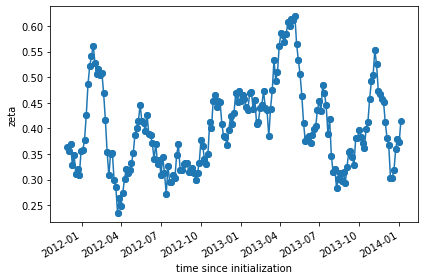

In [31]:
ssh_metric.plot.line('-o')
plt.tight_layout()

In [76]:
## save ds to output netcdf
#ds.to_netcdf(path=outFilePath)
#ssh = ds.zeta
#sst = ds.isel(s_rho=-1)
#temp = ds.temp
#salt = ds.salt
#u = ds.u
#v = ds.v
out = []
out.append([ssh])
out.append([sst])

out.to_dataset(name='truth_run')

#ssh.to_netcdf(path=outFilePath+'ssh.nc')
#out = xr.combine_by_coords([ssh, sst])
out

AttributeError: 'list' object has no attribute 'to_dataset'

In [50]:
out

<xarray.Dataset>
Dimensions:        (boundary: 4, eta_psi: 316, eta_rho: 317, eta_u: 317, eta_v: 316, ocean_time: 384, s_w: 31, tracer: 2, xi_psi: 271, xi_rho: 272, xi_u: 271, xi_v: 272)
Coordinates:
    lon_rho        (eta_rho, xi_rho) float64 dask.array<chunksize=(317, 272), meta=np.ndarray>
    lat_rho        (eta_rho, xi_rho) float64 dask.array<chunksize=(317, 272), meta=np.ndarray>
  * ocean_time     (ocean_time) datetime64[ns] 2011-11-28T12:00:00 ... 2014-0...
    s_rho          float64 -0.004799
  * s_w            (s_w) float64 -1.0 -0.9433 -0.8883 ... -0.02161 -0.01 0.0
    lon_u          (eta_u, xi_u) float64 dask.array<chunksize=(317, 271), meta=np.ndarray>
    lat_u          (eta_u, xi_u) float64 dask.array<chunksize=(317, 271), meta=np.ndarray>
    lon_v          (eta_v, xi_v) float64 dask.array<chunksize=(316, 272), meta=np.ndarray>
    lat_v          (eta_v, xi_v) float64 dask.array<chunksize=(316, 272), meta=np.ndarray>
    lon_psi        (eta_psi, xi_psi) float64 dask.array<chunksize=(316, 271), meta=np.ndarray>
    lat_psi        (eta_psi, xi_psi) float64 dask.array<chunksize=(316, 271), meta=np.ndarray>
Dimensions without coordinates: boundary, eta_psi, eta_rho, eta_u, eta_v, tracer, xi_psi, xi_rho, xi_u, xi_v
Data variables: (12/88)
    zeta           (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 317, 272), meta=np.ndarray>
    ntimes         int32 ...
    ndtfast        int32 ...
    dt             float64 ...
    dtfast         float64 ...
    dstart         datetime64[ns] ...
    ...             ...
    shflux         (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 317, 272), meta=np.ndarray>
    ssflux         (ocean_time, eta_rho, xi_rho) float32 dask.array<chunksize=(1, 317, 272), meta=np.ndarray>
    sustr          (ocean_time, eta_u, xi_u) float32 dask.array<chunksize=(1, 317, 271), meta=np.ndarray>
    svstr          (ocean_time, eta_v, xi_v) float32 dask.array<chunksize=(1, 316, 272), meta=np.ndarray>
    bustr          (ocean_time, eta_u, xi_u) float32 dask.array<chunksize=(1, 317, 271), meta=np.ndarray>
    bvstr          (ocean_time, eta_v, xi_v) float32 dask.array<chunksize=(1, 316, 272), meta=np.ndarray>
Attributes:
    long_name:  free-surface
    units:      meter
    time:       ocean_time
    grid:       grid
    location:   face
    field:      free-surface, scalar, series

In [66]:
a = []
a.append(xr.DataArray([[5.]], dims=('x', 'y'), coords=dict(x=[1.],y=[2.]), name="var")) 
a.append(xr.DataArray([[1.]], dims=('x', 'y'), coords=dict(x=[2.],y=[2.]), name="var")) 
a.append(xr.DataArray([[2.]], dims=('x', 'y'), coords=dict(x=[1.],y=[1.]), name="var"))
a

[<xarray.DataArray 'var' (x: 1, y: 1)>
 array([[5.]])
 Coordinates:
   * x        (x) float64 1.0
   * y        (y) float64 2.0,
 <xarray.DataArray 'var' (x: 1, y: 1)>
 array([[1.]])
 Coordinates:
   * x        (x) float64 2.0
   * y        (y) float64 2.0,
 <xarray.DataArray 'var' (x: 1, y: 1)>
 array([[2.]])
 Coordinates:
   * x        (x) float64 1.0
   * y        (y) float64 1.0]